In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import style
from sklearn.preprocessing import LabelEncoder

In [8]:
sns.set(style="whitegrid",color_codes=True)
# style.use('ggplot')

In [43]:
df = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


### Index : 0 - Extremely Weak 1 - Weak 2 - Normal 3 - Overweight 4 - Obesity 5 - Extreme Obesity

In [10]:
#First Method : 
# df1=pd.get_dummies(df.Gender,drop_first=True)
# df2 = pd.concat([df,df1], axis=1)
# df2.head()

In [34]:
#Second_Method 
lb = LabelEncoder()
df["Gender"] = lb.fit_transform(df["Gender"])
df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [35]:

df['Index'] = df.Index.map({0:'Extremely Weak',1:'Weak',2:'Normal',3:'Overweight',4:'Obesity',5:'Extreme Obesity'})
df.head()

,Gender,Height,Weight,Index
0,1,174,96,Obesity
1,1,189,87,Normal
2,0,185,110,Obesity
3,0,195,104,Overweight
4,1,149,61,Overweight


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [37]:
X = df.drop('Index',axis=1)
y = df.Index


In [39]:
#not much useful because it basically for binary classification
model = LogisticRegression()
model.fit(X,y)

list_score = cross_val_score(model,X,y,cv=10,scoring='accuracy')
print("Accuracy Score : ", list_score)
print("Average Accuracy Score : ",list_score.mean()*100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Accuracy Score :  [0.8  0.68 0.68 0.72 0.78 0.7  0.76 0.8  0.76 0.74]
Average Accuracy Score :  74.2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

### K-Folds Cross_Validation used to estimate the skill of machine learning models on new data.
#### It is one method that attempts to maximize the use of the available data for training and then testing a model. 
#### It is particularly useful for assessing model performance, as it provides a range of accuracy scores across (somewhat) different data sets.

In [16]:

knn = KNeighborsClassifier(n_neighbors=8)
# score = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
# print(score)
# print(score.mean())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [17]:
print("Accuracy Score : ", metrics.accuracy_score(y_test, y_pred, normalize=False), "%")

Accuracy Score :  92 %


In [18]:
#Prediction : 
knn.predict([[lb.transform(["Female"])[0],110,85]])[0]

'Extreme Obesity'

In [19]:
k_values = range(1,31)
acc_mean_score = []

for k_val in k_values:
    knn = KNeighborsClassifier(n_neighbors=k_val)
    score = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    acc_mean_score.append(round(score.mean(),2))
print("Accuracy for different value of k(1-30)\n", acc_mean_score)    

Accuracy for different value of k(1-30)
 [0.89, 0.88, 0.9, 0.89, 0.9, 0.88, 0.9, 0.9, 0.91, 0.9, 0.9, 0.89, 0.89, 0.88, 0.88, 0.88, 0.88, 0.88, 0.88, 0.87, 0.87, 0.87, 0.86, 0.85, 0.84, 0.84, 0.84, 0.83, 0.83, 0.83]


In [20]:
import numpy as np
print("Best Value of K : ",np.argmax(acc_mean_score))
print("Best Accuracy Scoren : ", np.max(acc_mean_score))


Best Value of K :  8
Best Accuracy Scoren :  0.91


In [21]:
import pickle   #our classifier

with open('weight_category_prediction.pickle','wb') as f:
    pickle.dump(knn,f)                   

import json          #for columns name
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open('columns.json','w') as f:
    f.write(json.dumps(columns))

### Gaussian NB

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [23]:
nb = GaussianNB()
nb.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
pred_y = nb.predict(X)

print("Predicted Class : ",nb.predict([[0,128,90]]))

Predicted Class :  ['Extreme Obesity']


In [58]:
print(accuracy_score(pred_y,y))

0.732


In [27]:
#Null Accuray

y.value_counts()/len(y)*100          #Most ddominant class is 5 

Extreme Obesity    39.6
Obesity            26.0
Normal             13.8
Overweight         13.6
Weak                4.4
Extremely Weak      2.6
Name: Index, dtype: float64

In [26]:
#Here Supoort is number of counts of that lable in dataset and F1 score get by formula : 2PR/P+R
#And as high as our F1 score our accuray is increase

# Precision : TP / Total Predicted Positive(P) : 185/185+15+1
# Recall : TP / Total Instances(P+N) : 185/185+10+3
    

print(classification_report(y,pred_y))
print(confusion_matrix(y,pred_y))

                 precision    recall  f1-score   support

Extreme Obesity       0.92      0.93      0.93       198
 Extremely Weak       0.92      0.85      0.88        13
         Normal       0.53      0.77      0.63        69
        Obesity       0.69      0.69      0.69       130
     Overweight       0.34      0.21      0.26        68
           Weak       0.87      0.59      0.70        22

       accuracy                           0.73       500
      macro avg       0.71      0.67      0.68       500
   weighted avg       0.72      0.73      0.72       500

[[185   0   0  10   3   0]
 [  0  11   1   0   0   1]
 [  0   0  53   1  14   1]
 [ 15   0  15  90  10   0]
 [  1   0  23  30  14   0]
 [  0   1   8   0   0  13]]


### Partial Fit

In [ ]:
# Incremental fit on a batch of samples.

# This method is expected to be called several times consecutively on different chunks of a dataset so as to implement out-of-core or online learning.

# This is especially useful when the whole dataset is too big to fit in memory at once.

# nb.partial_fit(X,y,np.unique(y))

In [ ]:
# pred_y = nb.predict(X)

In [ ]:
# print(classification_report(y,pred_y))
# print(confusion_matrix(y,pred_y))

In [ ]:
# y_proba = nb.predict_proba(X)[:,]
# len(y_proba)
# len(y)
# y_proba.shape

In [ ]:
# class_0 = []

# for i in y_proba:
#     class_0.append(i[0])
    

## Support Vector Machine

In [28]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [44]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [45]:
#another way
gen = LabelEncoder()
df['Gender'] = gen.fit_transform(df['Gender'])
df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [46]:
# Bin labels must be one fewer than the number of bin edges

# bins = (-1,0,1,2,3,4,5)
# health =['Extremely Weak', 'Weak', 'Normal', 'Overweight', 'Obesity','Extreme Obesity']
# df['Index'] = pd.cut(df['Index'], bins=bins, labels=health)

#EASY METHOD
df['Index'] = df.Index.map({0:'Extremely Weak',1:'Weak',2:'Normal',3:'Overweight',4:'Obesity',5:'Extreme Obesity'})
df.head()

,Gender,Height,Weight,Index
0,1,174,96,Obesity
1,1,189,87,Normal
2,0,185,110,Obesity
3,0,195,104,Overweight
4,1,149,61,Overweight


In [47]:
df.Index.value_counts()

Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: Index, dtype: int64

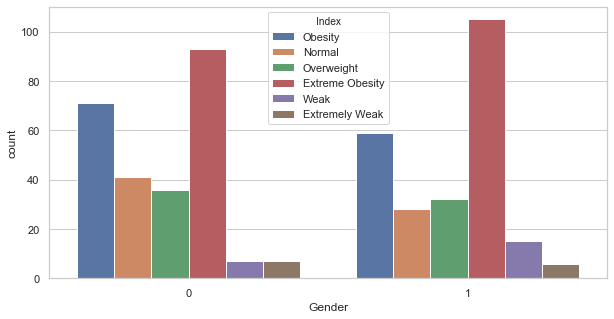

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender', hue='Index', data=df)
sns.set_style("whitegrid")

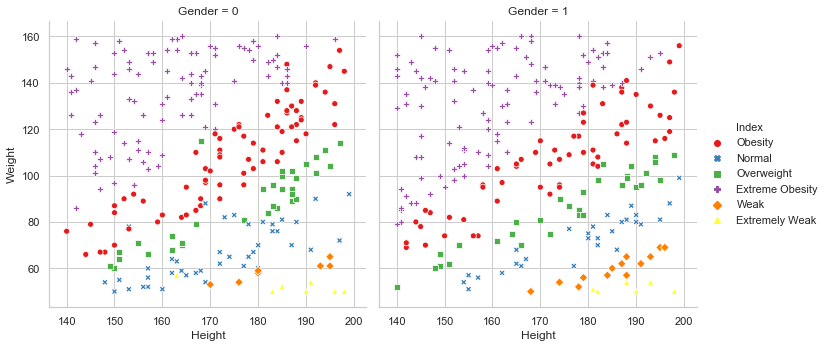

In [49]:
sns.relplot(x='Height', y="Weight", data=df, sizes=(50,100), kind='scatter', hue='Index',col='Gender',palette="Set1", style="Index")

In [ ]:
# sns.relplot(x="Index", y="Weight", hue="Gender", kind='line', data=df, aspect=3, height=5)

In [50]:
X = df.drop('Index',axis=1)
y = df['Index']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
#fall all the values in the fix range by the use of standard scaler
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)

In [53]:
clf = svm.SVC()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [54]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

Extreme Obesity       0.86      1.00      0.92        36
 Extremely Weak       0.00      0.00      0.00         3
         Normal       0.62      0.80      0.70        10
        Obesity       1.00      0.78      0.88        32
     Overweight       0.80      0.80      0.80        15
           Weak       0.60      0.75      0.67         4

       accuracy                           0.84       100
      macro avg       0.65      0.69      0.66       100
   weighted avg       0.83      0.84      0.83       100



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
print(confusion_matrix(y_test,y_pred))

[[36  0  0  0  0  0]
 [ 0  0  1  0  0  2]
 [ 0  0  8  0  2  0]
 [ 6  0  0 25  1  0]
 [ 0  0  3  0 12  0]
 [ 0  0  1  0  0  3]]


In [56]:
print(accuracy_score(y_test, y_pred))

0.84


In [57]:
clf.predict(st.transform([[0,210,125]]))


array(['Overweight'], dtype=object)